In [ ]:
#1901611 조준영 skikit-learn 모듈을 사용한 지도학습 실습

In [1]:
#print없이 바로 이미지등을 볼 수 있음
%matplotlib inline
from IPython.display import display #jupyter notebook
import numpy as np #선형대수 연산, 푸리에 변환, 유사 난수 생성기등을 사용
import matplotlib.pyplot as plt #과학 계산용 그래프 라이브러리
import pandas as pd #판다스 DataFrame자료형에 sql로 데이터를 가져옴
import mglearn #그래프나 데이터 적재와 관련된 유틸리티 함수

w[0]: 0.393906  b: -0.031804


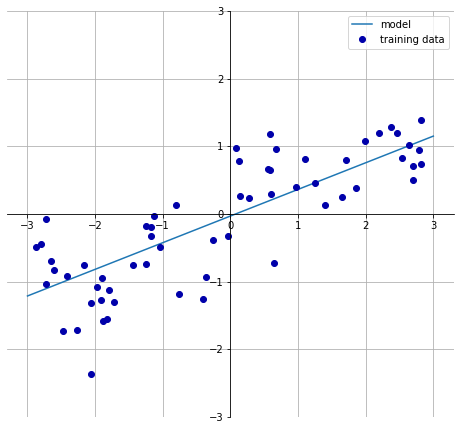

In [2]:
mglearn.plots.plot_linear_regression_wave() #wave 데이터 세트: 2개의 클래스, 26개의 샘플을 plot으로 그림

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60) #wave 데이터 세트의 특징과 정답값 저장

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #seed를 42로 고정, 테스트 데이터와 학습데이터 분리

lr = LinearRegression().fit(X_train,y_train) #학습데이터를 통해 선형회귀 수행

print("lr.coef_: {}".format(lr.coef_)) #y=ax+b 에서 기울기 a
print("lr.intercept_: {}".format(lr.intercept_)) #y=ax+b 에서 y절편 b

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train))) #학습 데이터로 선형회귀 모델에 정확도 측정
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test))) #테스트 데이터로 선형회귀 모델에 정확도 측정
print("과소적합(underfitting)") #모델이 제대로 학습되지 못함

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
과소적합(underfitting)


In [10]:
#선형 회귀 (최소 제곱법)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston() #보스턴 주택가격 데이터 세트의 특징과 정답값 저장

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #seed를 0로 고정, 테스트 데이터와 학습데이터 분리

lr = LinearRegression().fit(X_train,y_train) #학습데이터를 통해 선형회귀 수행

D:\박상현\python_code\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [11]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train))) #학습 데이터로 선형회귀 모델에 정확도 측정
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test))) #테스트 데이터로 선형회귀 모델에 정확도 측정
print("과대적합(overfitting)") #모델이 학습 데이터에만 최적화 됨

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61
과대적합(overfitting)


In [14]:
import platform
platform.system()
#운영체제별로 폰트를 설정
if platform.system() == 'Darwin' : # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : #Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

    plt.rc('axes',unicode_minus=False) #마이너스 폰트 설정
#글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format ='retina'

D:\박상현\python_code\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


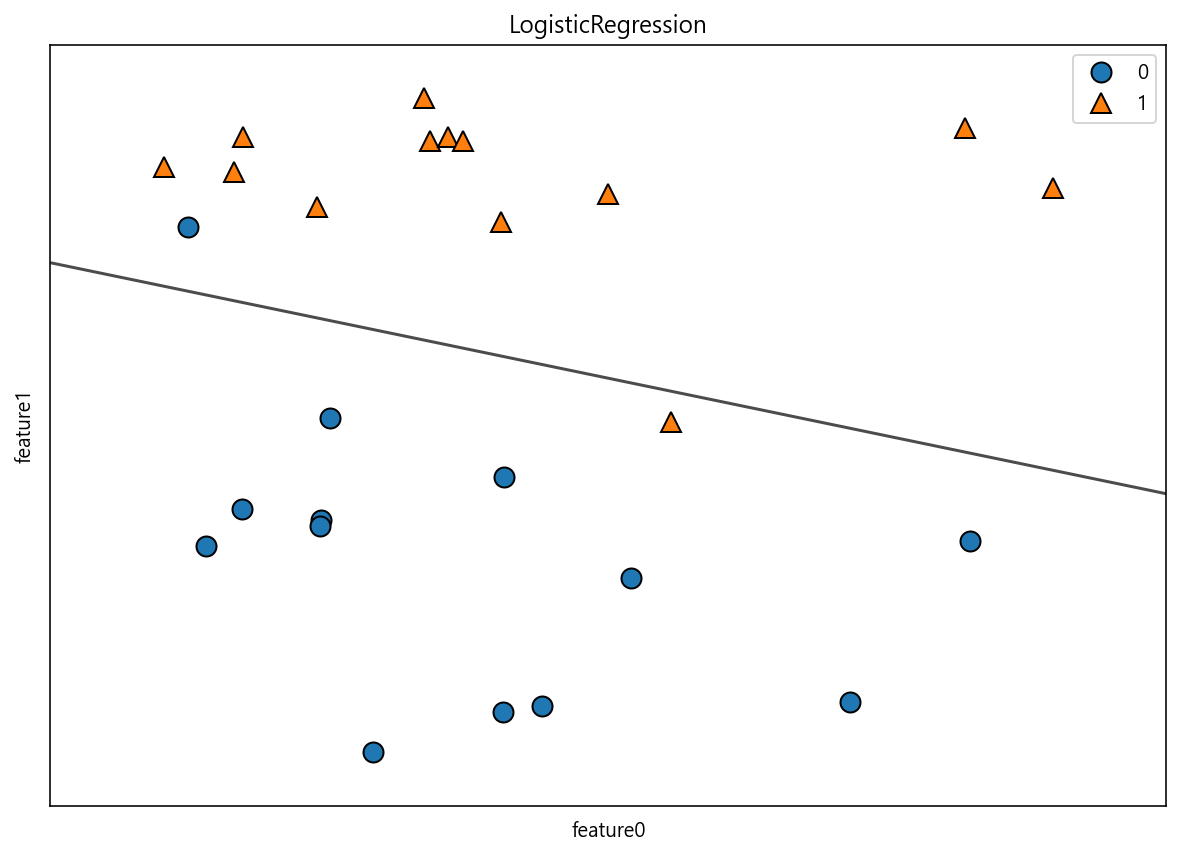

In [17]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge() #forge 데이터 세트의 특징과 정답값 저장

fig, axes= plt.subplots(1,1,figsize=(10,7))

model = LogisticRegression()

clf=model.fit(X,y) #학습데이터를 통해 로지스틱 회귀를 수행
mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5, ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axes)
axes.set_title("{}".format(clf.__class__.__name__))
axes.set_xlabel("feature0")
axes.set_ylabel("feature1")
axes.legend()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#seed를 42로 고정, 테스트 데이터와 학습데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train,y_train) #학습데이터를 통해 로지스틱 회귀 수행

print("훈련 세트 점수: {:.2f}".format(logreg.score(X_train,y_train))) #학습 데이터로 로지스틱 회귀 모델의 정확도 측정
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test,y_test))) #테스트 데이터로 로지스틱 회귀 모델의 정확도 측정

훈련 세트 점수: 0.96
테스트 세트 점수: 0.94


D:\박상현\python_code\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


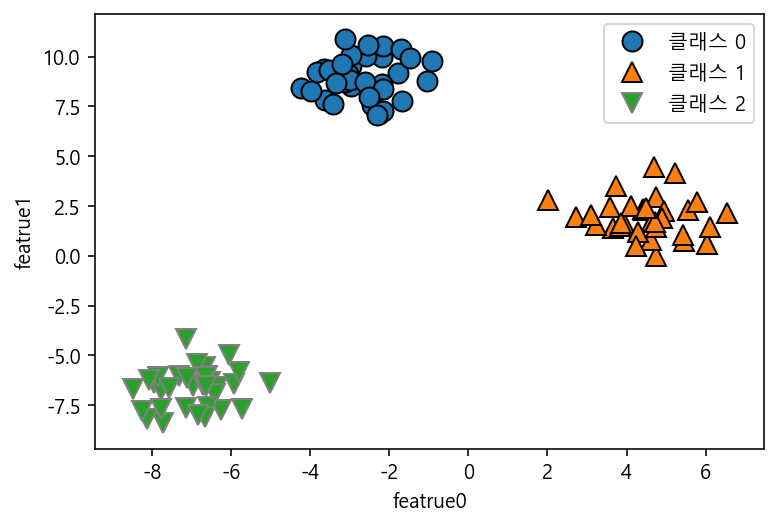

In [21]:
# 다중 클래스 분류를 위한 데이터 세트 시각화
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("featrue0")
plt.ylabel("featrue1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

In [23]:
# 선형 서포트 벡터 머신 (Hard-Margin SVM)
from sklearn.svm import LinearSVC

linear_svm=LinearSVC().fit(X,y)

print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


세 개의 일대다 분류기가 만든 모델


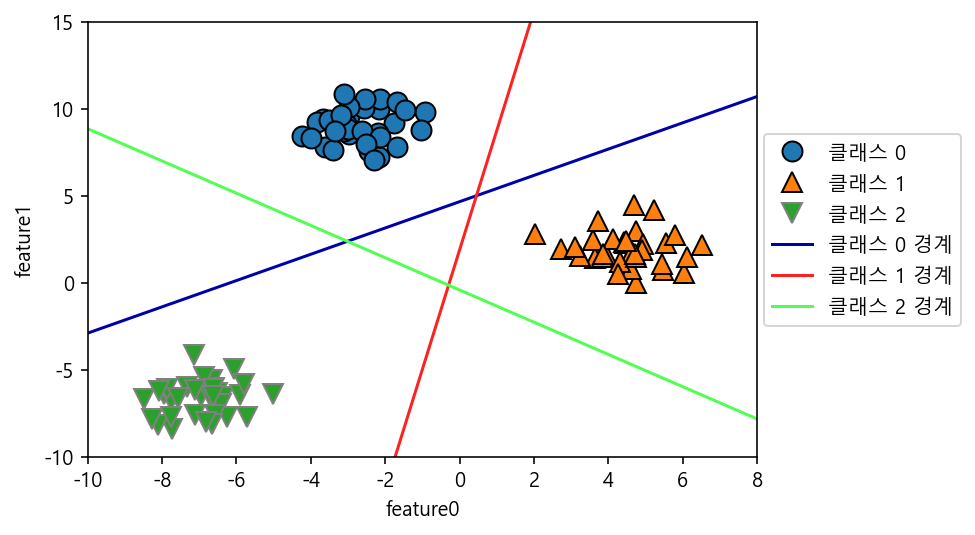

In [25]:
print('세 개의 일대다 분류기가 만든 모델')

mglearn.discrete_scatter(X[:,0],X[:,1],y)

line= np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))

세 개의 일대다 분류기가 만든 다중 클래스 모델


Text(0, 0.5, 'feature1')

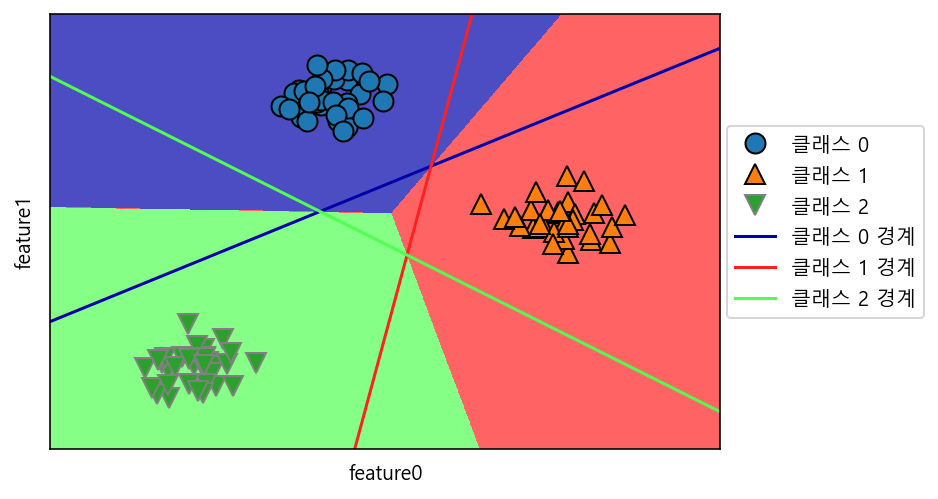

In [27]:
print('세 개의 일대다 분류기가 만든 다중 클래스 모델')

mglearn.plots.plot_2d_classification(linear_svm, X,fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("feature0")
plt.ylabel("feature1")

선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터 세트


Text(0, 0.5, 'feature1')

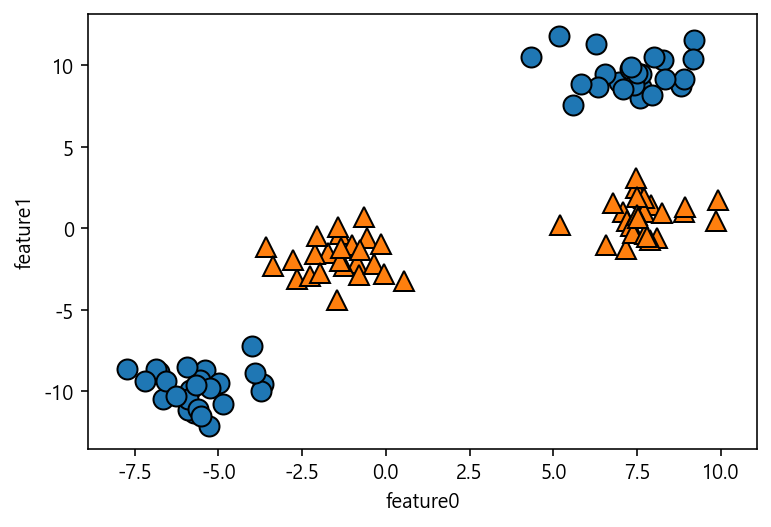

In [28]:
X, y = make_blobs(centers=4, random_state=8)
y=y%2
print('선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터 세트')

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")

선형 SVM으로 만들어진 모델(직선)


D:\박상현\python_code\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'feature1')

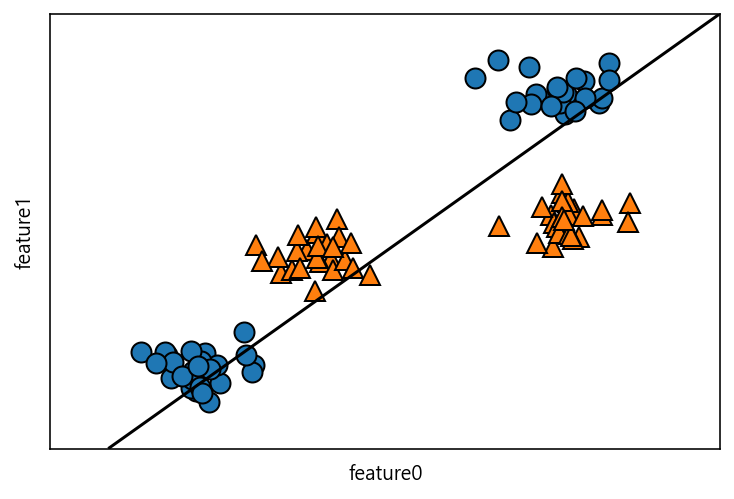

In [29]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)

print('선형 SVM으로 만들어진 모델(직선)')

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")

feature1에서 유용한 세 번째 feature을 추가하여 확장한 데이터 세트


C:\Users\DILAB\AppData\Local\Temp\ipykernel_3216\4140744136.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=26)


Text(0.5, 0, 'feature1 ** 2')

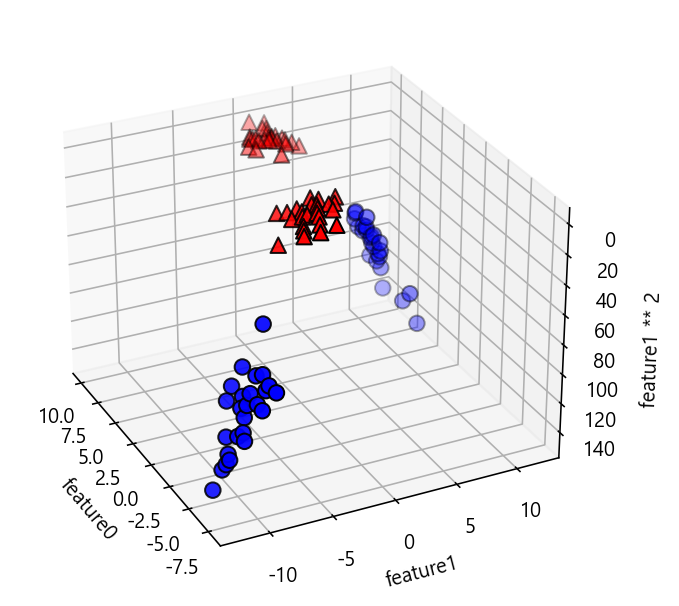

In [30]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

print('feature1에서 유용한 세 번째 feature을 추가하여 확장한 데이터 세트')

#3차원 그래프
ax = Axes3D(figure, elev=-152, azim=26)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그린다
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

확장된 3차원 데이터 세트에서 선형 SVM이 만든 모델(평면)


D:\박상현\python_code\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DILAB\AppData\Local\Temp\ipykernel_3216\3206931111.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

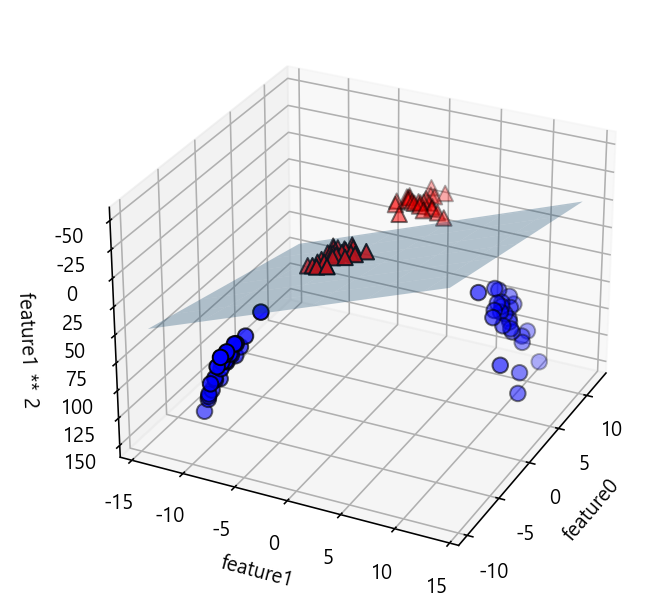

In [34]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

print('확장된 3차원 데이터 세트에서 선형 SVM이 만든 모델(평면)')

#선형 결정 경계 그리기
figure=plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy=np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY +intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=9, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

원래 두 개 feature에 투영한 모델


Text(0, 0.5, 'feature1')

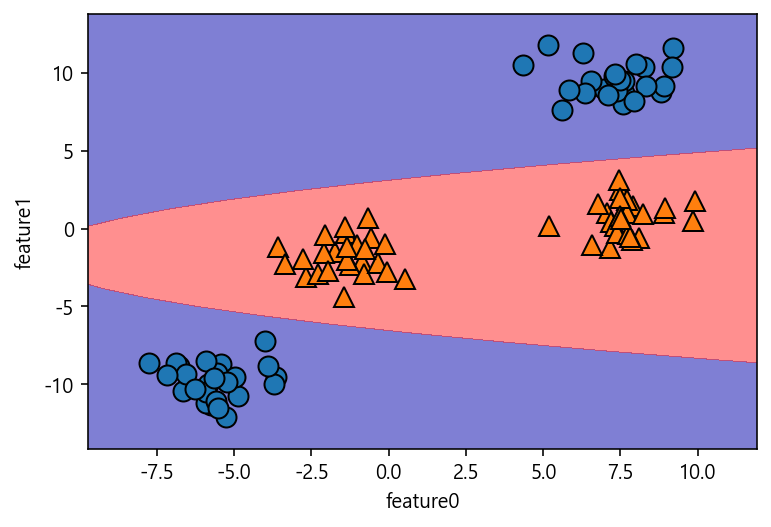

In [36]:
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

print('원래 두 개 feature에 투영한 모델')

plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")

RBF 커널을 사용한 SVM으로 만든 모델(곡선)과 서포트 벡터(큰 동그라미와 세모)


Text(0, 0.5, 'feature1')

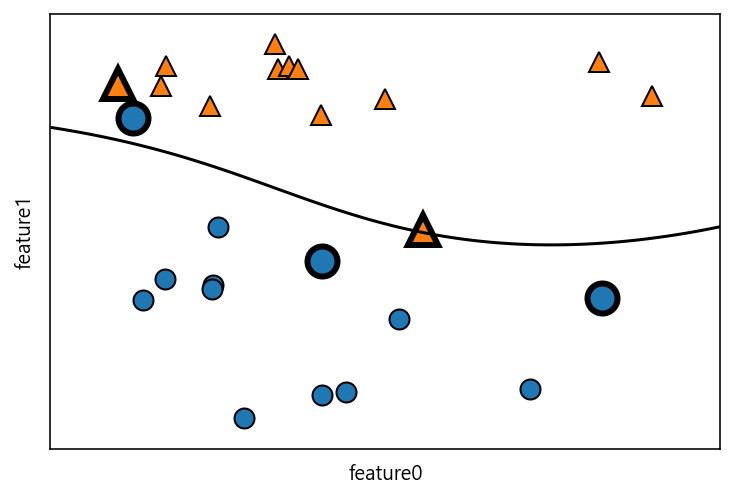

In [39]:
#Kernel-based Supprot Vector Machines (SVM)
from sklearn.svm import SVC

X,y=mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y) # kernel, C, gamma : 하이퍼 파라미터

#kernel='rbf' : 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산
#k_{rbf}(x1,x2) = exp(-gamma * ||x1 - x2||^2)
#C : 각 포인트의 중요도를 제한
#gamma : 가우시안 커널 폭의 역수 (작은 gamma 값은 모델의 복잡도 낮추고(예: 직선),
#         큰 gamma 값은 모델의 복잡도를 높임(예: 곡선))

print('RBF 커널을 사용한 SVM으로 만든 모델(곡선)과 서포트 벡터(큰 동그라미와 세모)')

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#서포트 벡터
sv = svm.support_vectors_

#dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("feature0")
plt.ylabel("feature1")

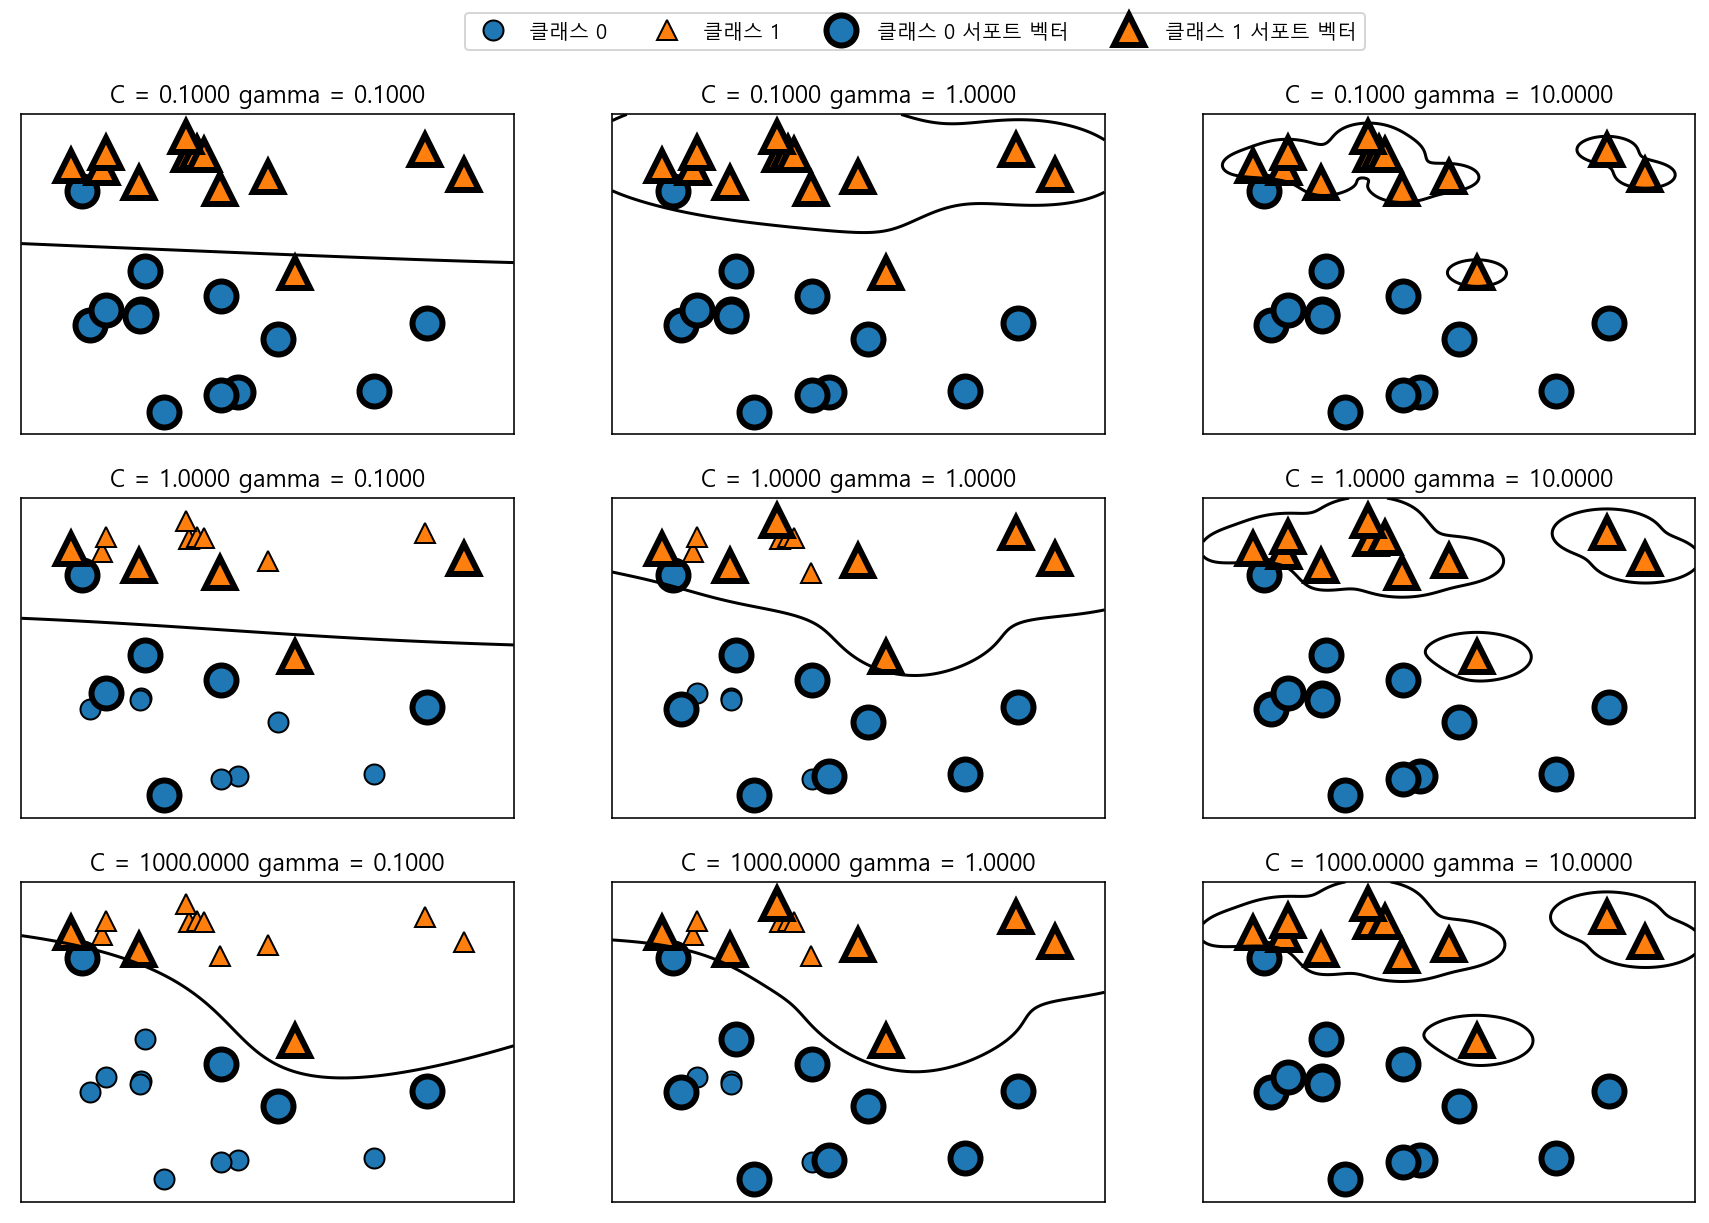

In [41]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터","클래스 1 서포트 벡터"], ncol=4, loc=(.9,1.2))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc= SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [44]:
#SVM을 위한 데이터 전처리

#훈련 세트에서 feature 별 최소값 계산
min_on_training = X_train.min(axis=0)

#훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최소값을 빼고 범위로 나누면
#각 특성에 대해 최소값은 0, 최대값은 1이다
X_train_scaled = (X_train - min_on_training) / range_on_training
print("feature 별 최소값\n{}".format(X_train_scaled.min(axis=0)))
print("feature 별 최대값\n{}".format(X_train_scaled.max(axis=0)))

feature 별 최소값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
feature 별 최대값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [45]:
#테스트 세트에도 같은 작업을 적용하지만
#훈련 세트에서 계산한 최소값과 범위 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [46]:
# C값을 증가시켰더니 모델의 성능 향상
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [9]:
#print없이 바로 이미지등을 볼 수 있음
%matplotlib inline
from IPython.display import display #jupyter notebook
import numpy as np #선형대수 연산, 푸리에 변환, 유사 난수 생성기등을 사용
import matplotlib.pyplot as plt #과학 계산용 그래프 라이브러리
import pandas as pd #판다스 DataFrame자료형에 sql로 데이터를 가져옴
import mglearn #그래프나 데이터 적재와 관련된 유틸리티 함수
import graphviz # 다양한 그래프 시각화

In [10]:
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
 plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
 plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [11]:
# 결정 트리
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer() # 유방암 데이터 세트

#seed를 42로 고정, 테스트 데이터와 학습데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [12]:
# 결정 트리의 높이를 최대 4로 변경
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names,
                impurity=False, filled=True)

In [25]:
import os
os.environ["PATH"] += os.pathsep + './' #현재 jupyter로 작성하고 있는 경로

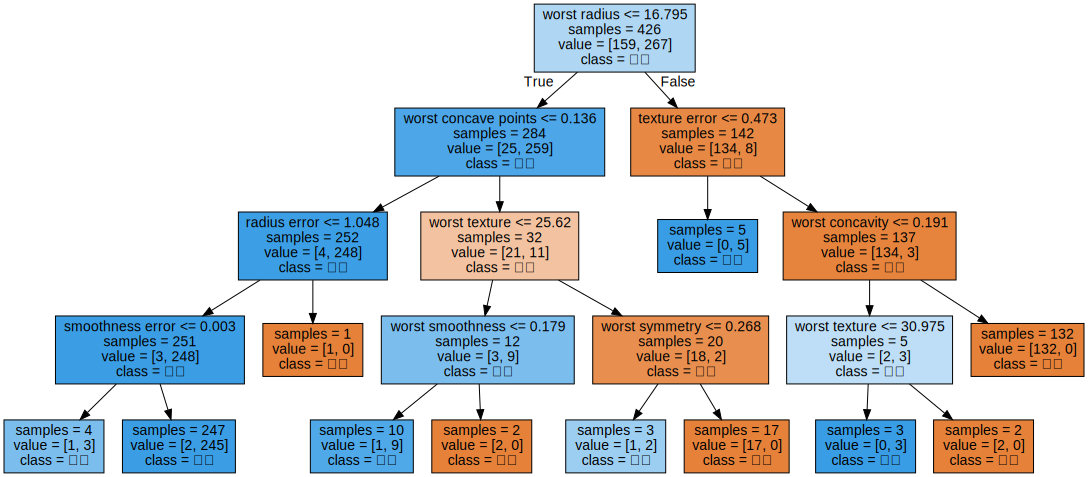

In [26]:
# 에러 발생하면, https://graphviz.org/download/에서 msi 파일 다운로드 받은 후에 재실행 필요
with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [27]:
# 트리를 만드는 결정에 각 feature가 얼마나 중요한지를 평가하는 feature importance
# feature = 0: 트리를 만드는데 사용하지 않음
# feature = 1: 타깃 클래스 예측
# feature importance의 합은 1
print("feature importance:\n{}".format(tree.feature_importances_))

feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


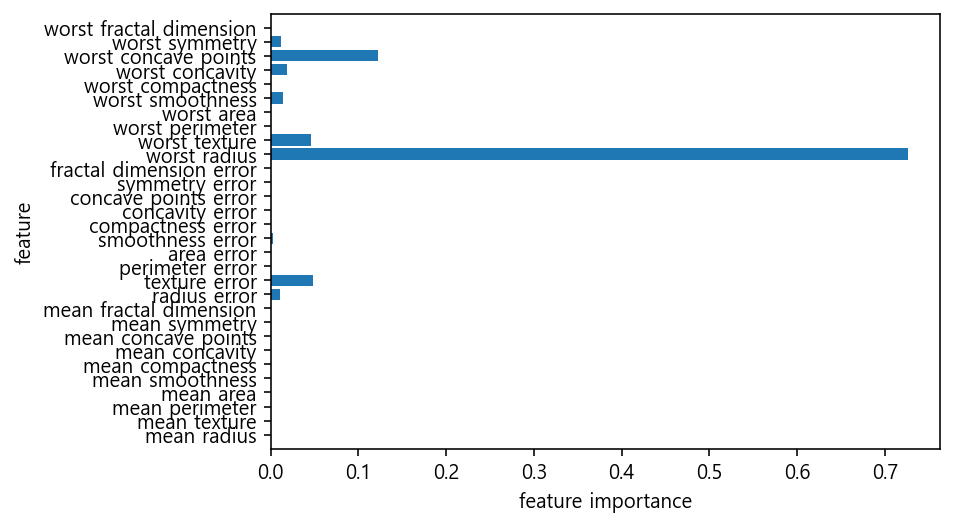

In [28]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


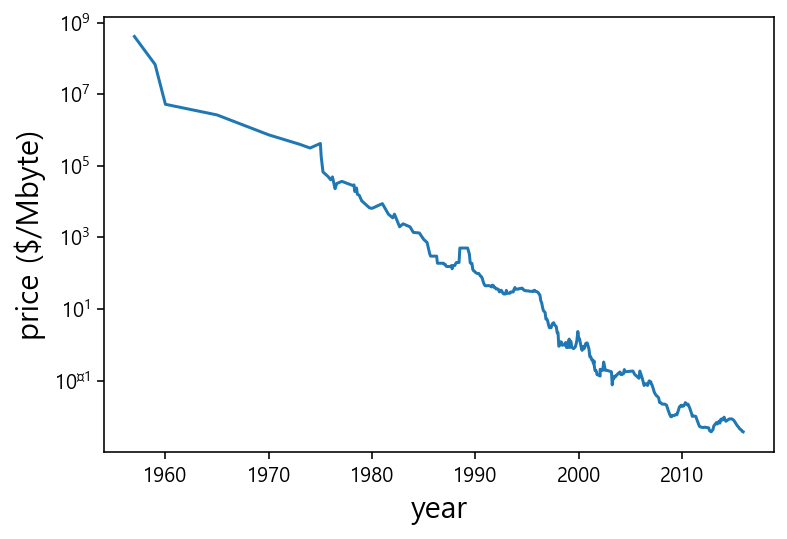

In [29]:
import os

path = os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv')

ram_prices = pd.read_csv(path)
ram_prices = ram_prices.iloc[:, 1:] # iloc: 정수로 columns접근, index number : 몇번째 인덱스 까

plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듦
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\DILAB\AppData\Local\Temp\ipykernel_23360\2843825336.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\DILAB\AppData\Local\Temp\ipykernel_23360\2843825336.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


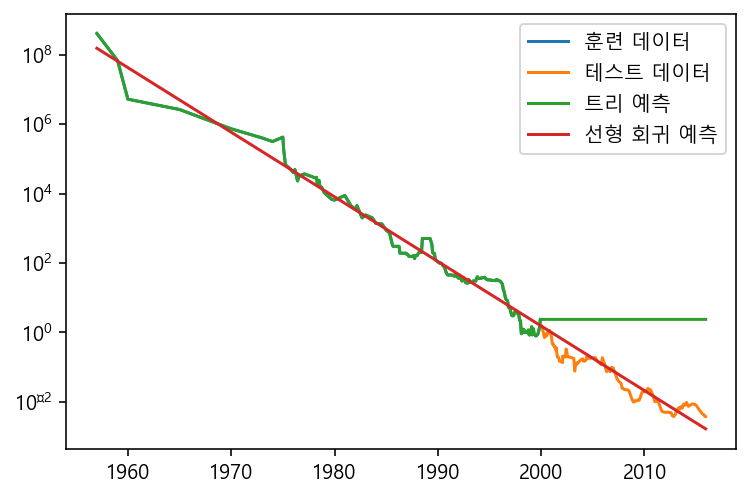

In [31]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label='선형 회귀 예측')
plt.legend()

In [33]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [34]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

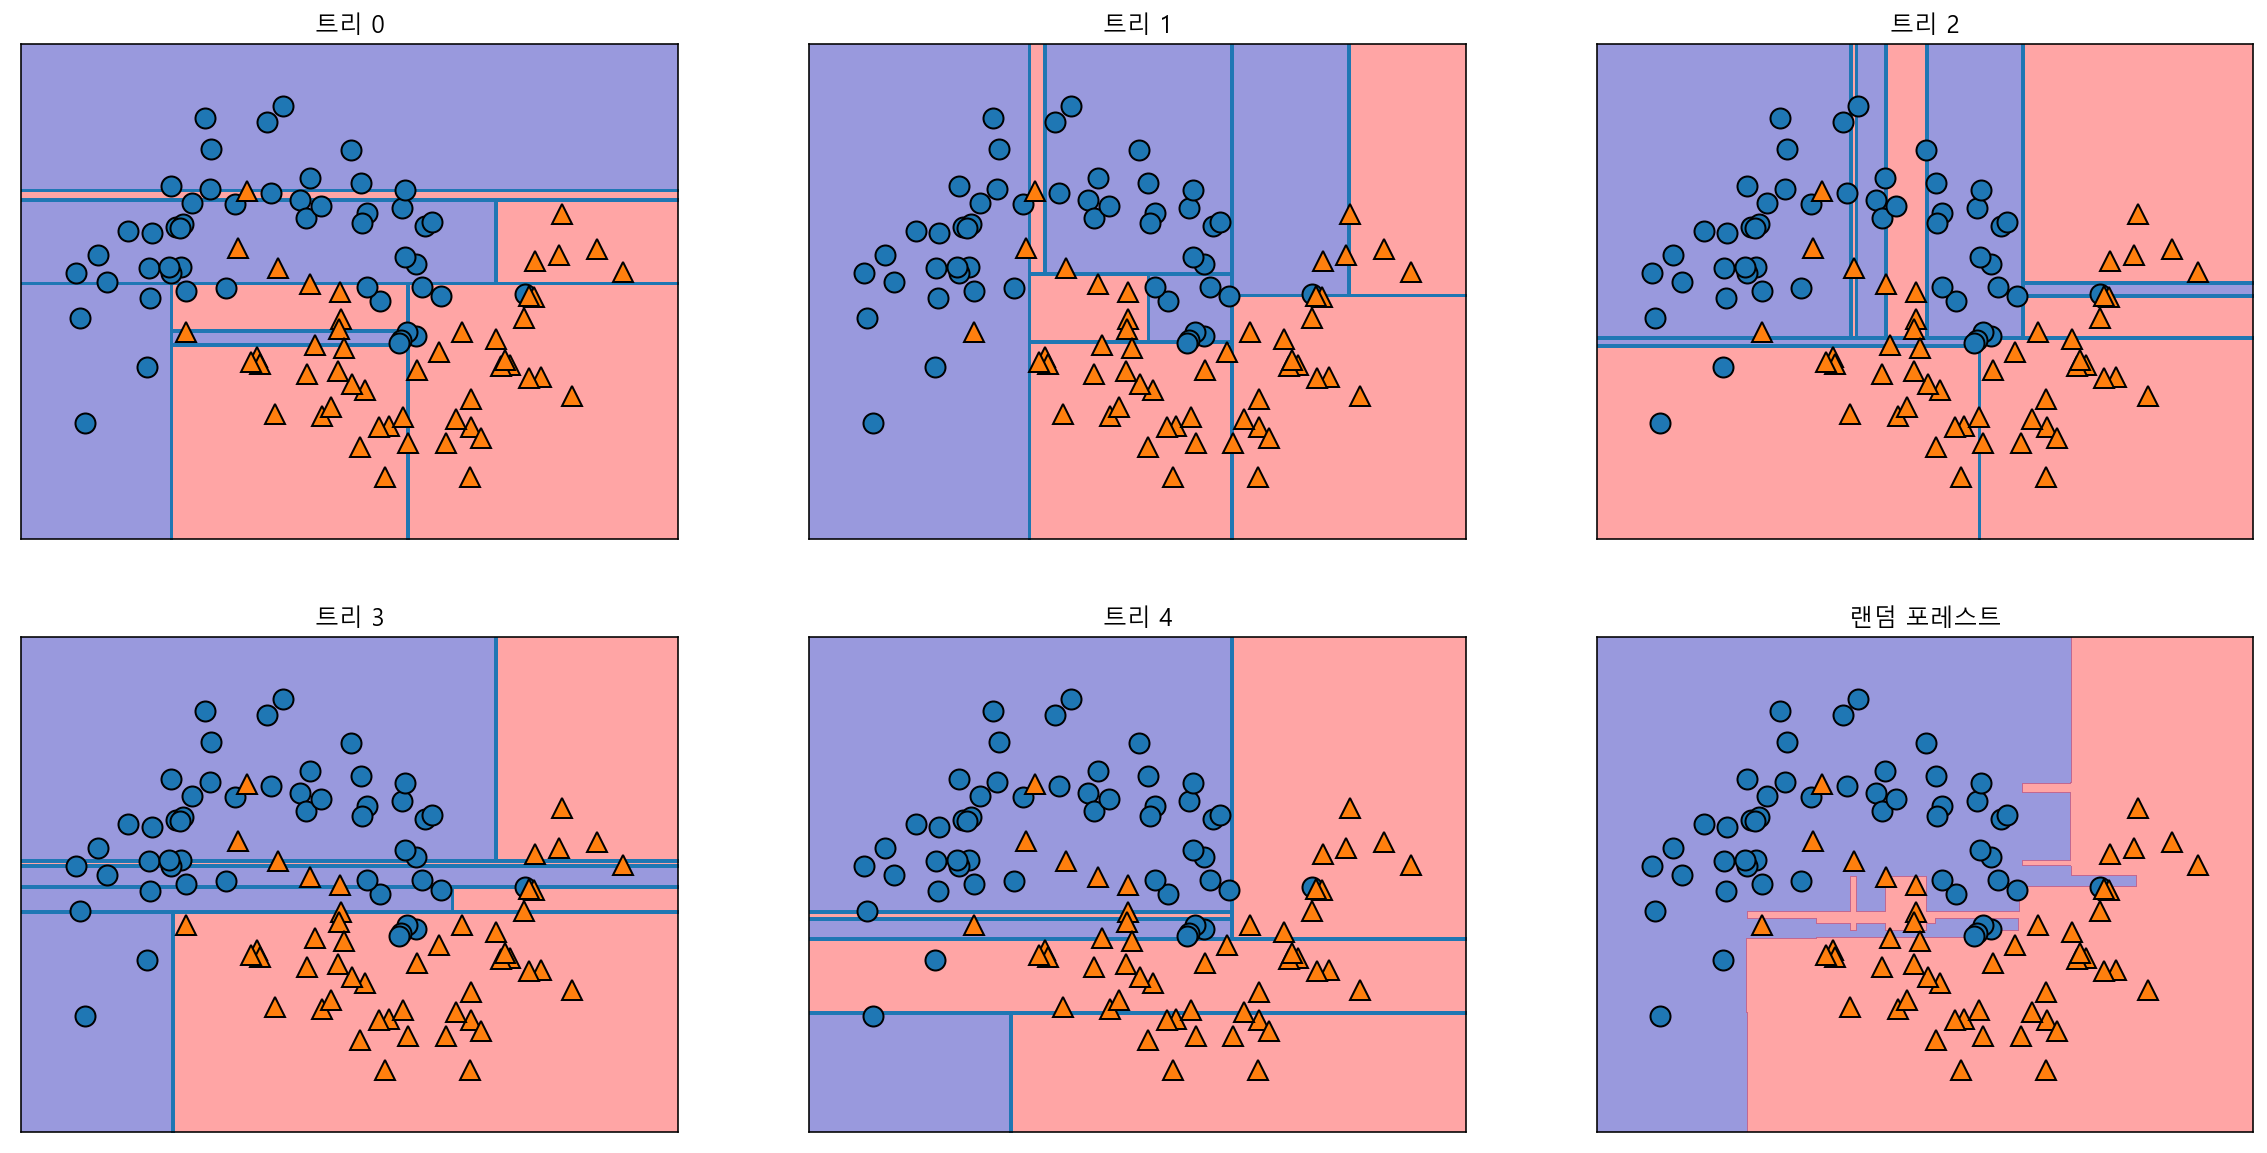

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:,1], y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


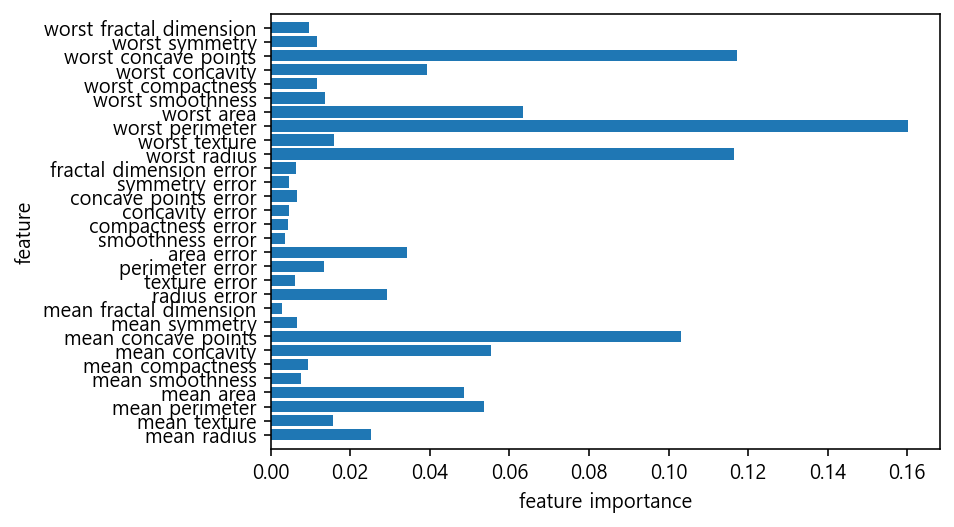

In [37]:
plot_feature_importances_cancer(forest)

In [38]:
# AdaBoost
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [40]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


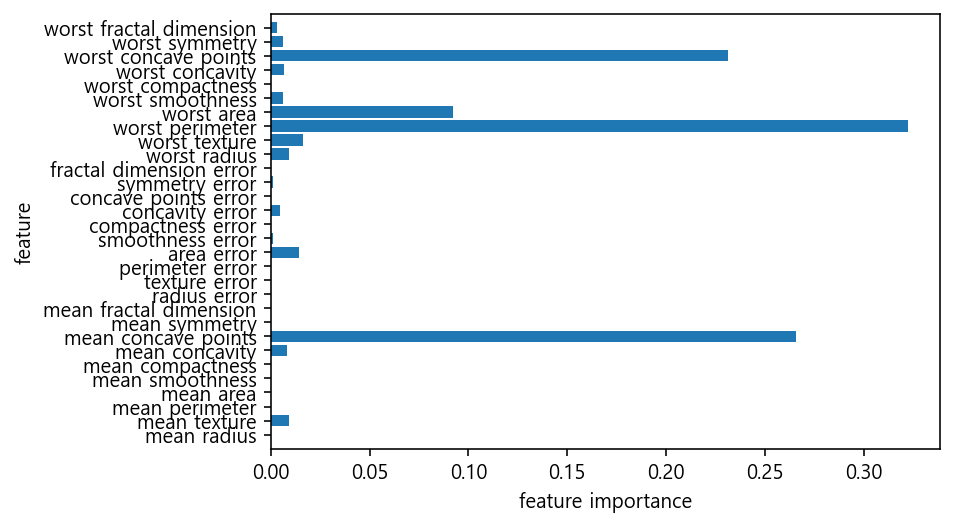

In [41]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

In [42]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [43]:
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
 plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
 plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

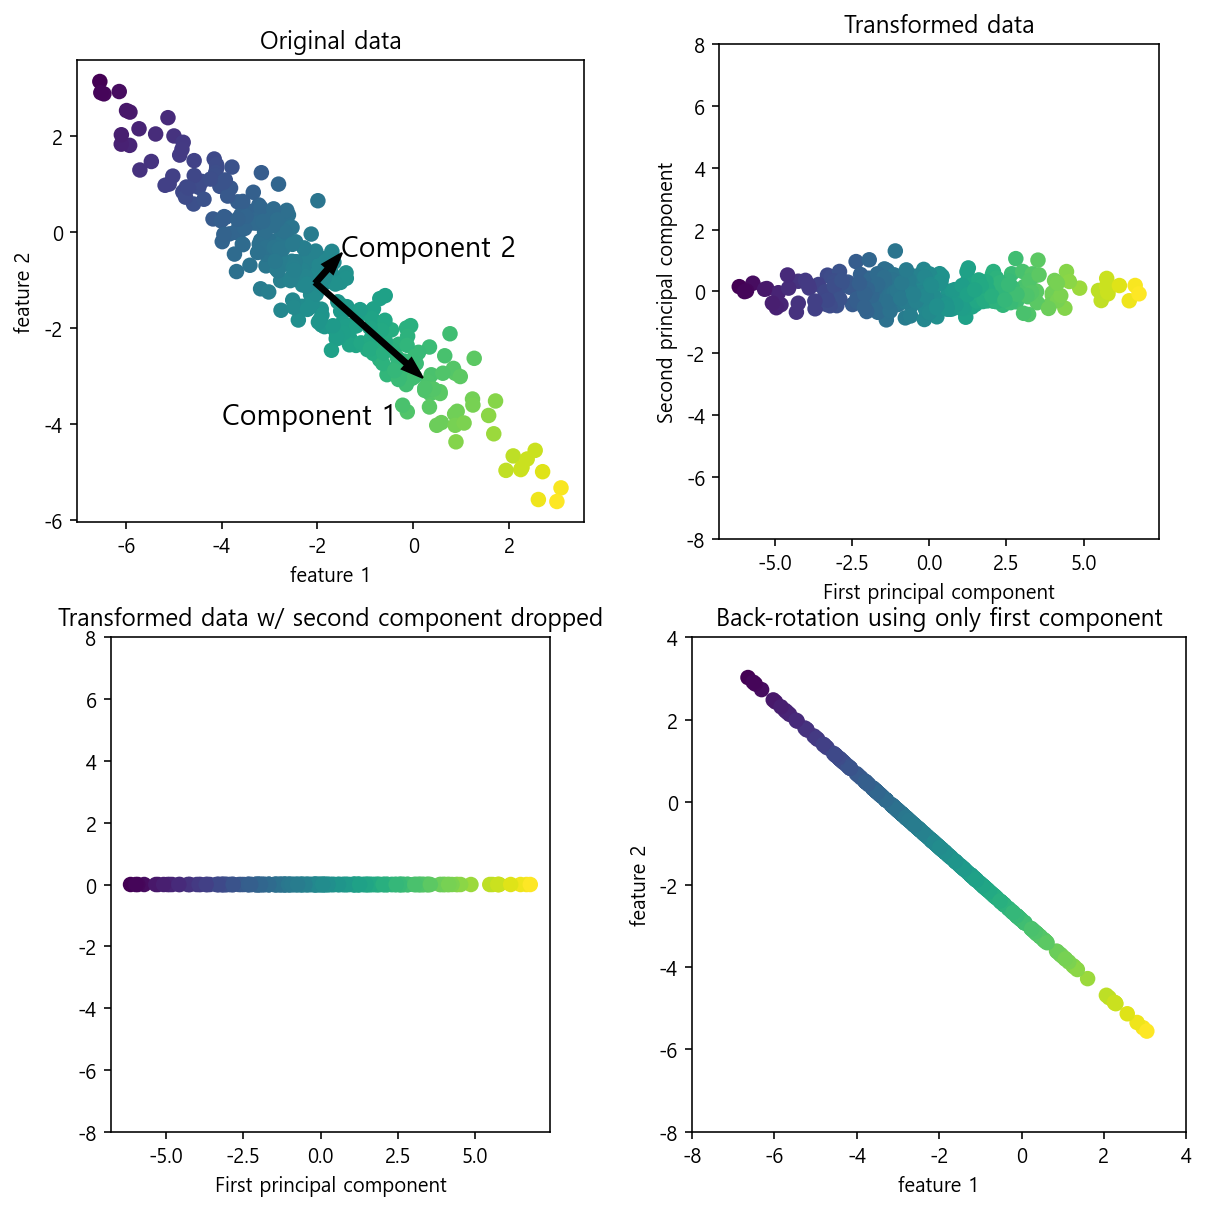

In [44]:
# PCA를 이용한 데이터 변환
mglearn.plots.plot_pca_illustration()

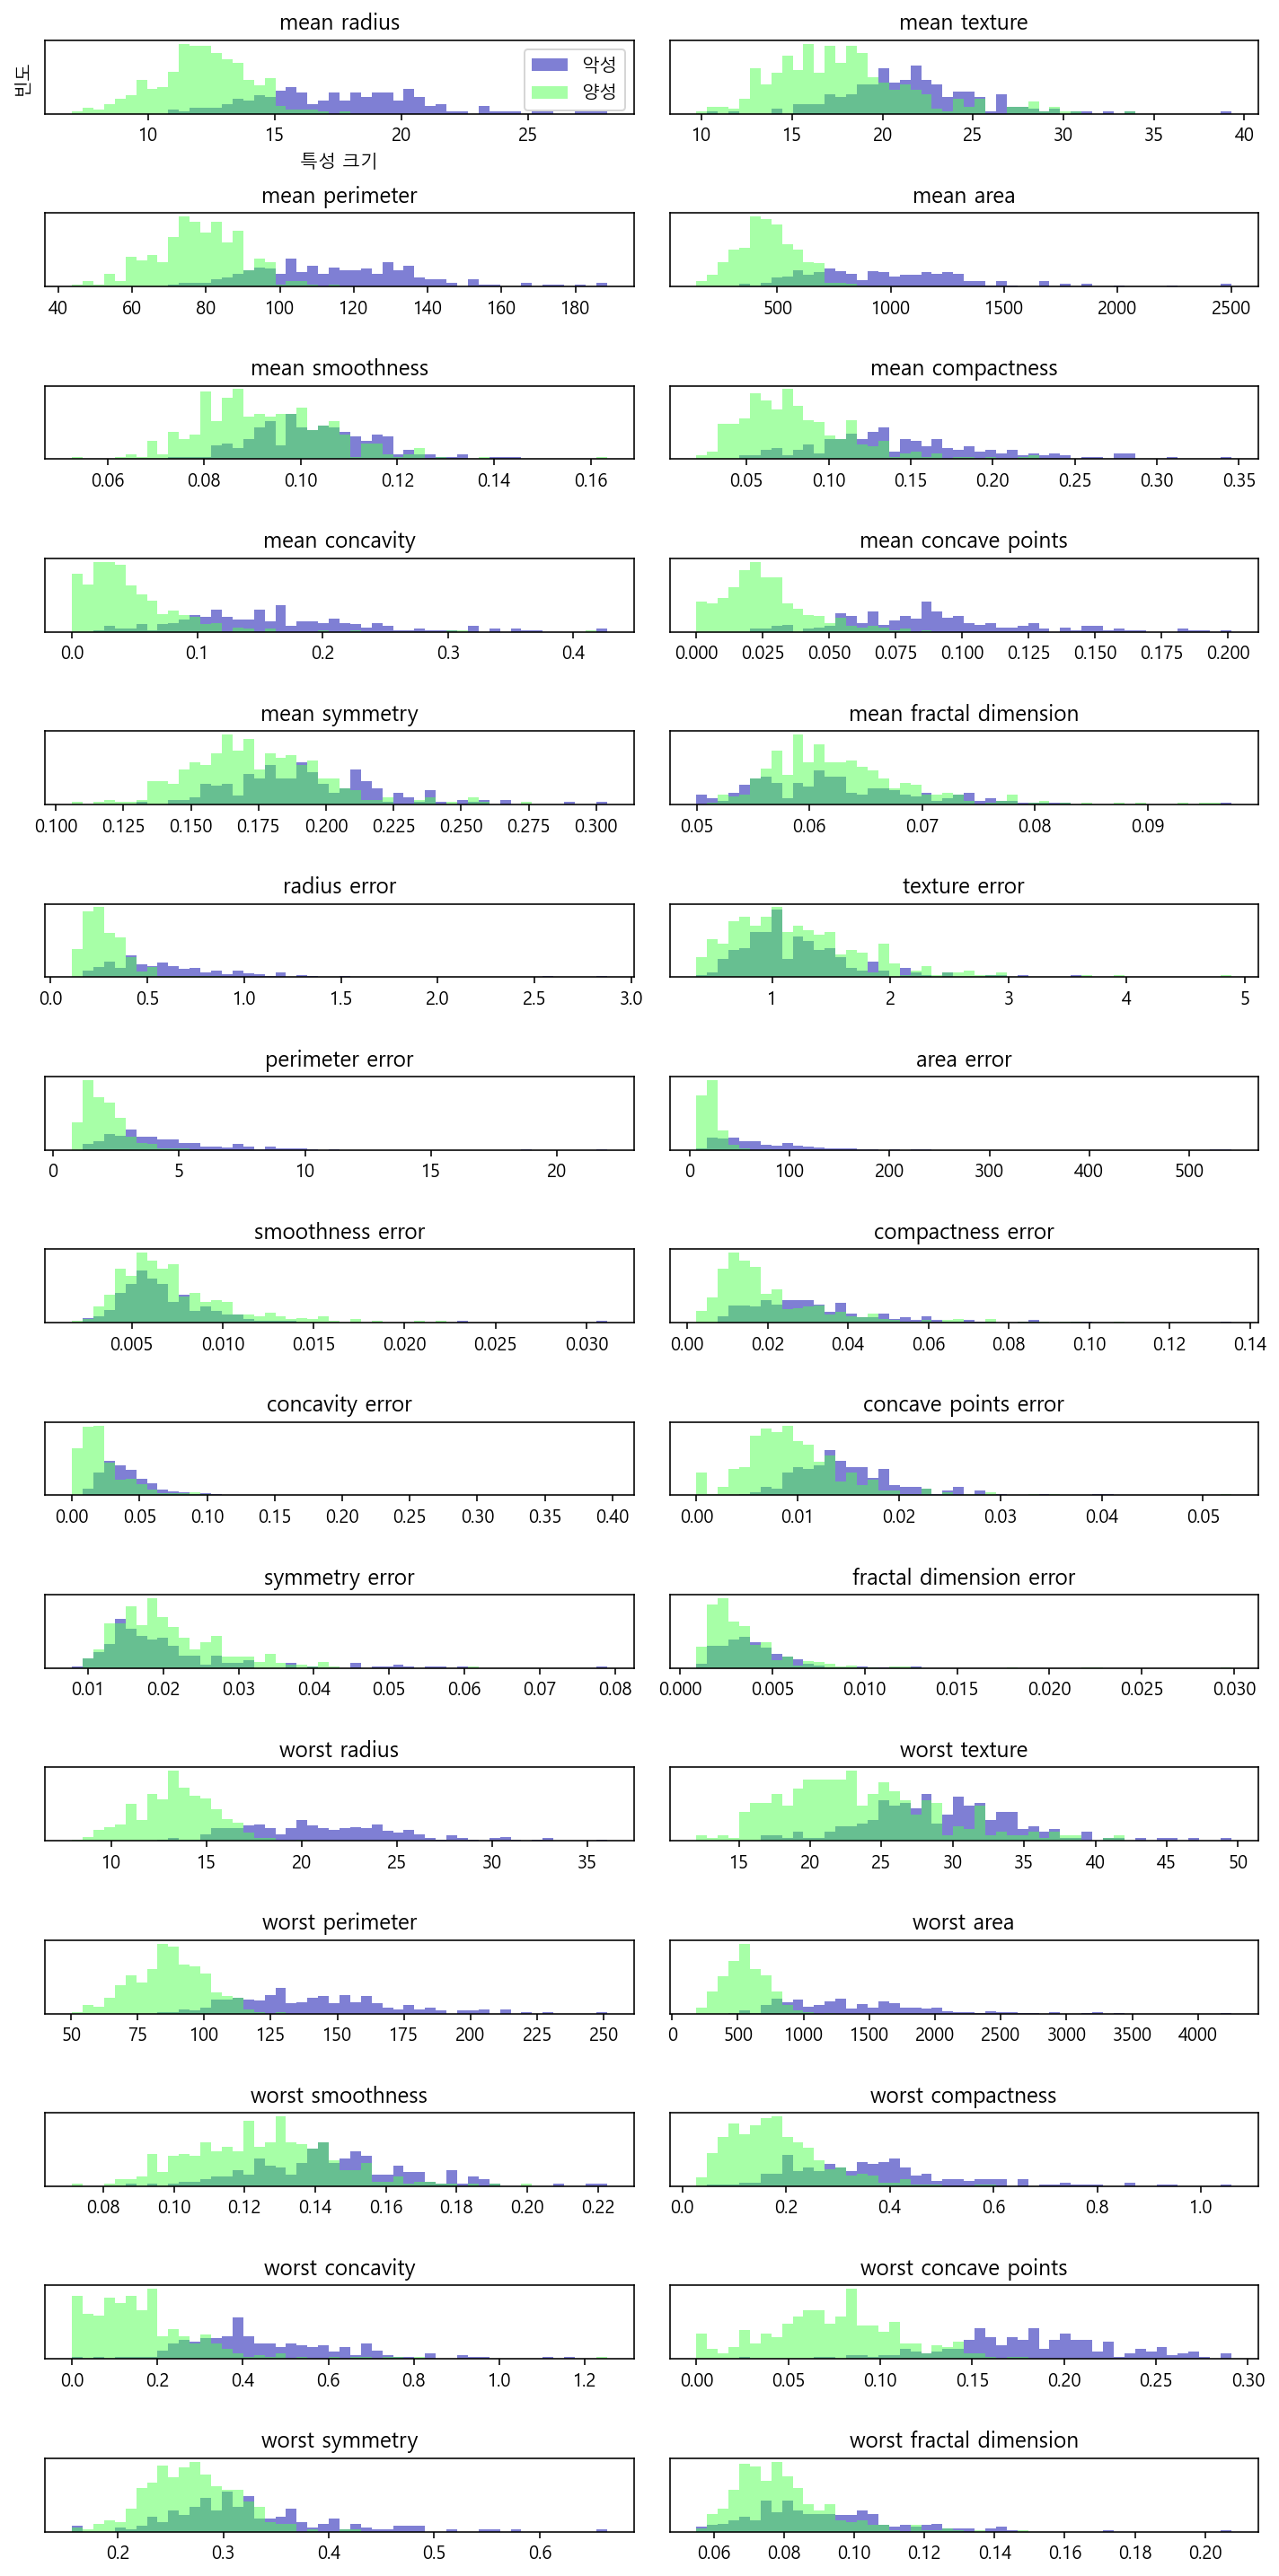

In [104]:
# PCA를 적용해 유방암 데이터셋 시각화하기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [105]:
# PCA를 적용하기 전에 StarndardScaler를 사용해 각 특성의 분산이 1이 되도록 조정
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [106]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개의 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델 만듦
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도


Text(0, 0.5, '두 번째 주성분')

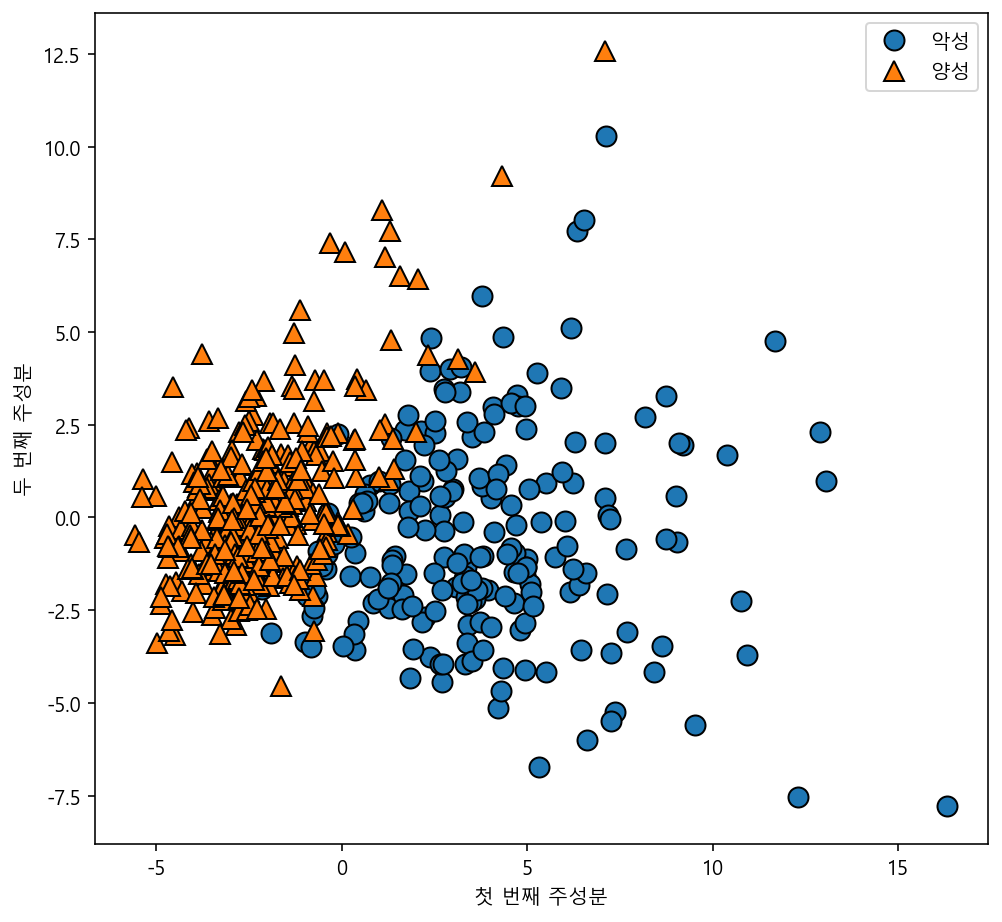

In [107]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냄
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
print('처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도')
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [108]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [109]:
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

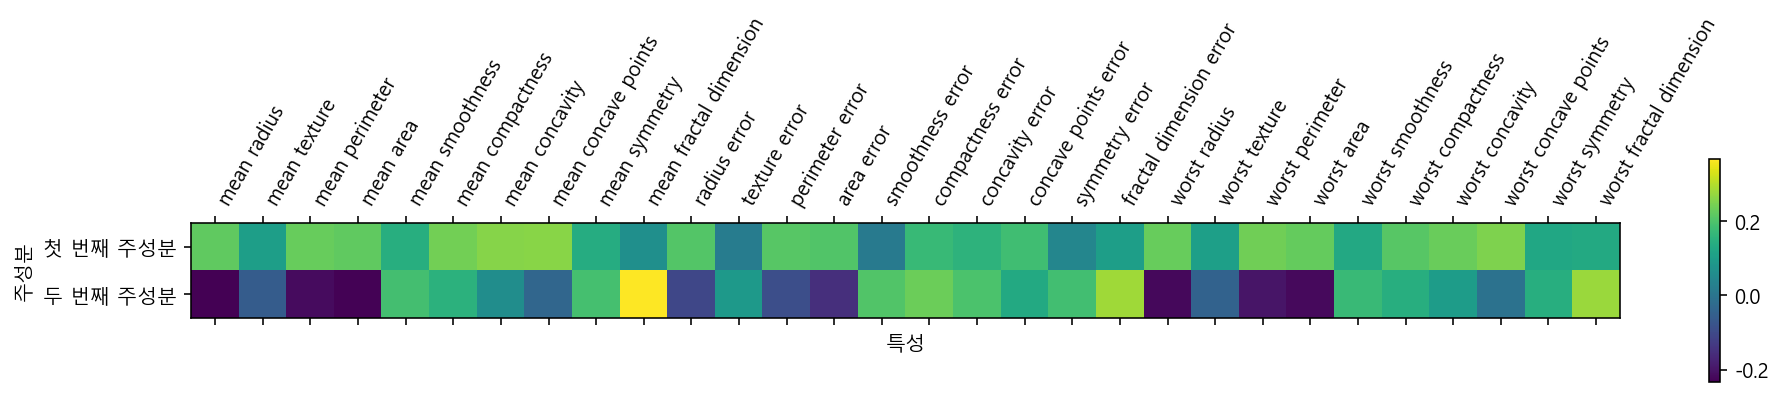

In [110]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

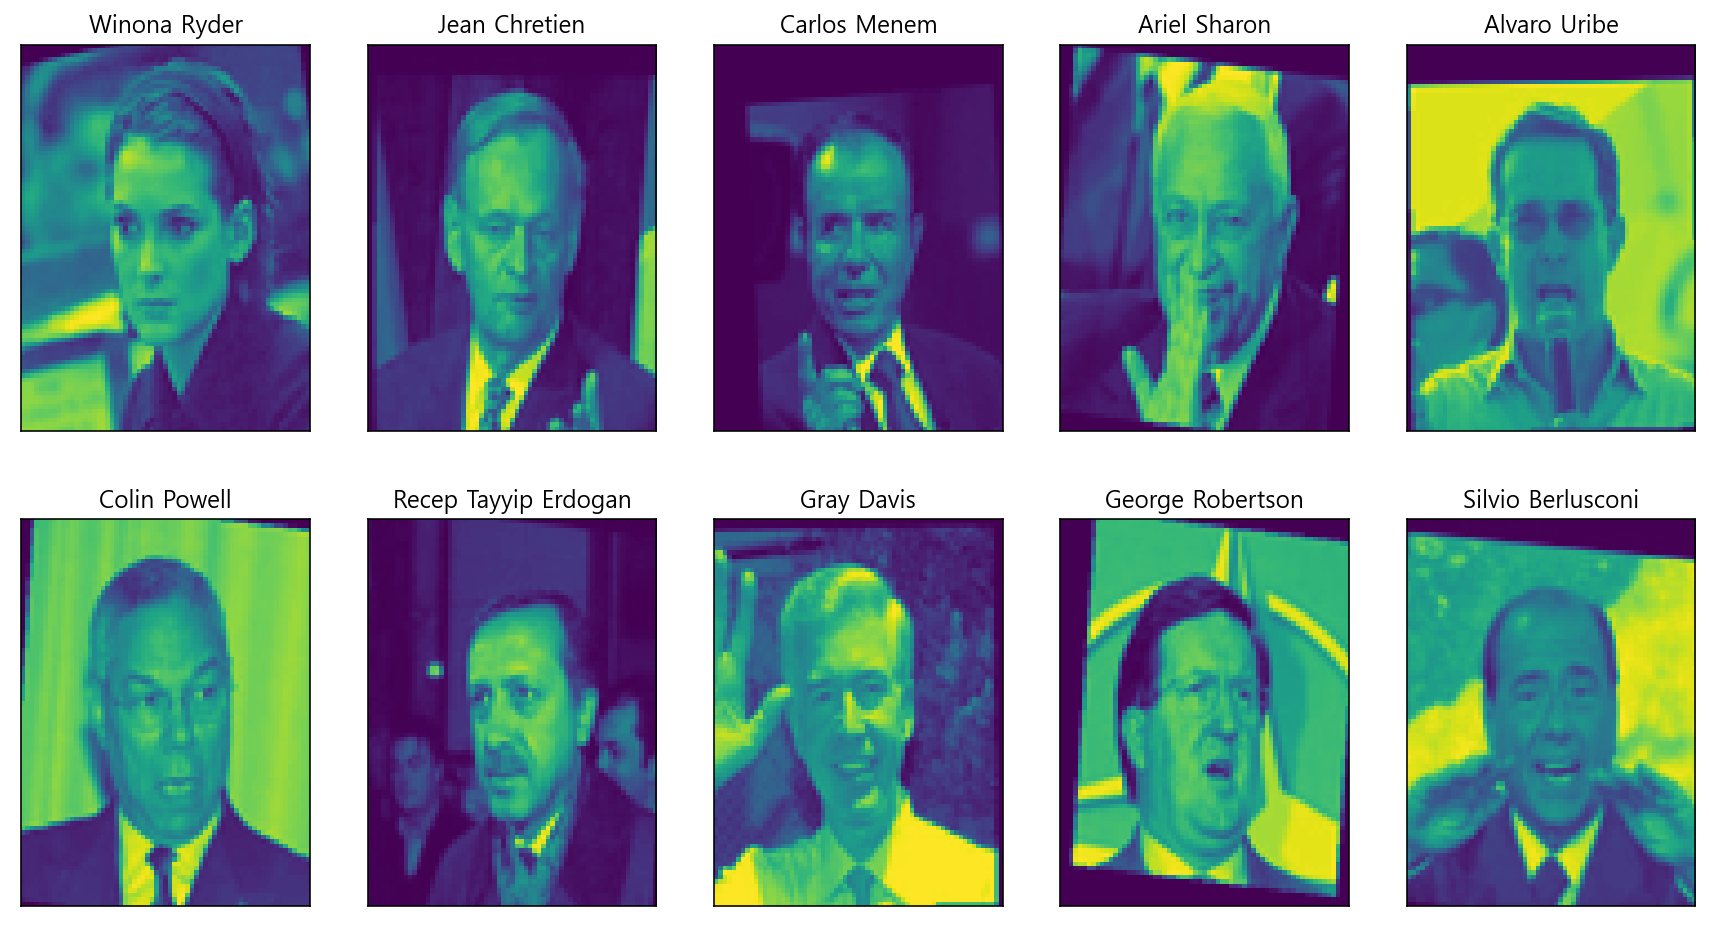

In [114]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [89]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [90]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [91]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
# MinMaxScalar를 적용하는 것과 거의 같음
X_people = X_people / 255.

C:\Users\DILAB\AppData\Local\Temp\ipykernel_23360\2364501917.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                    stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeighborsClassifiers 모델로 만듦
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.139535


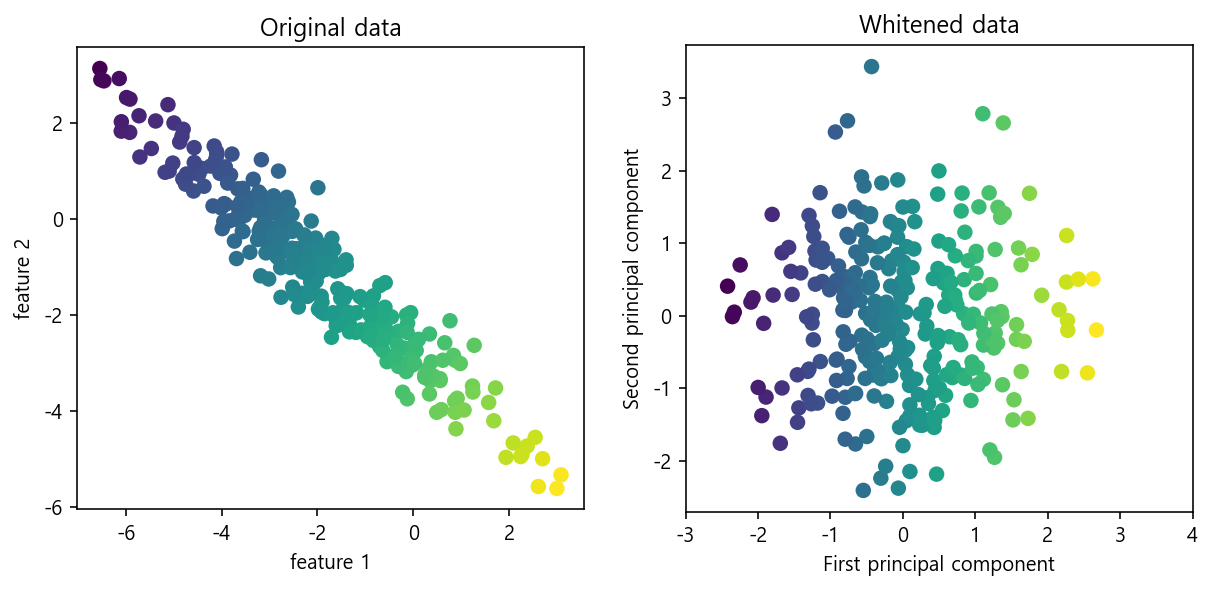

In [93]:
# 화이트닝 옵션을 사용한 PCA 데이터 변환
# 주성분의 스케일이 같아지도록 조정
mglearn.plots.plot_pca_whitening()

In [94]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [95]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.15


In [96]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


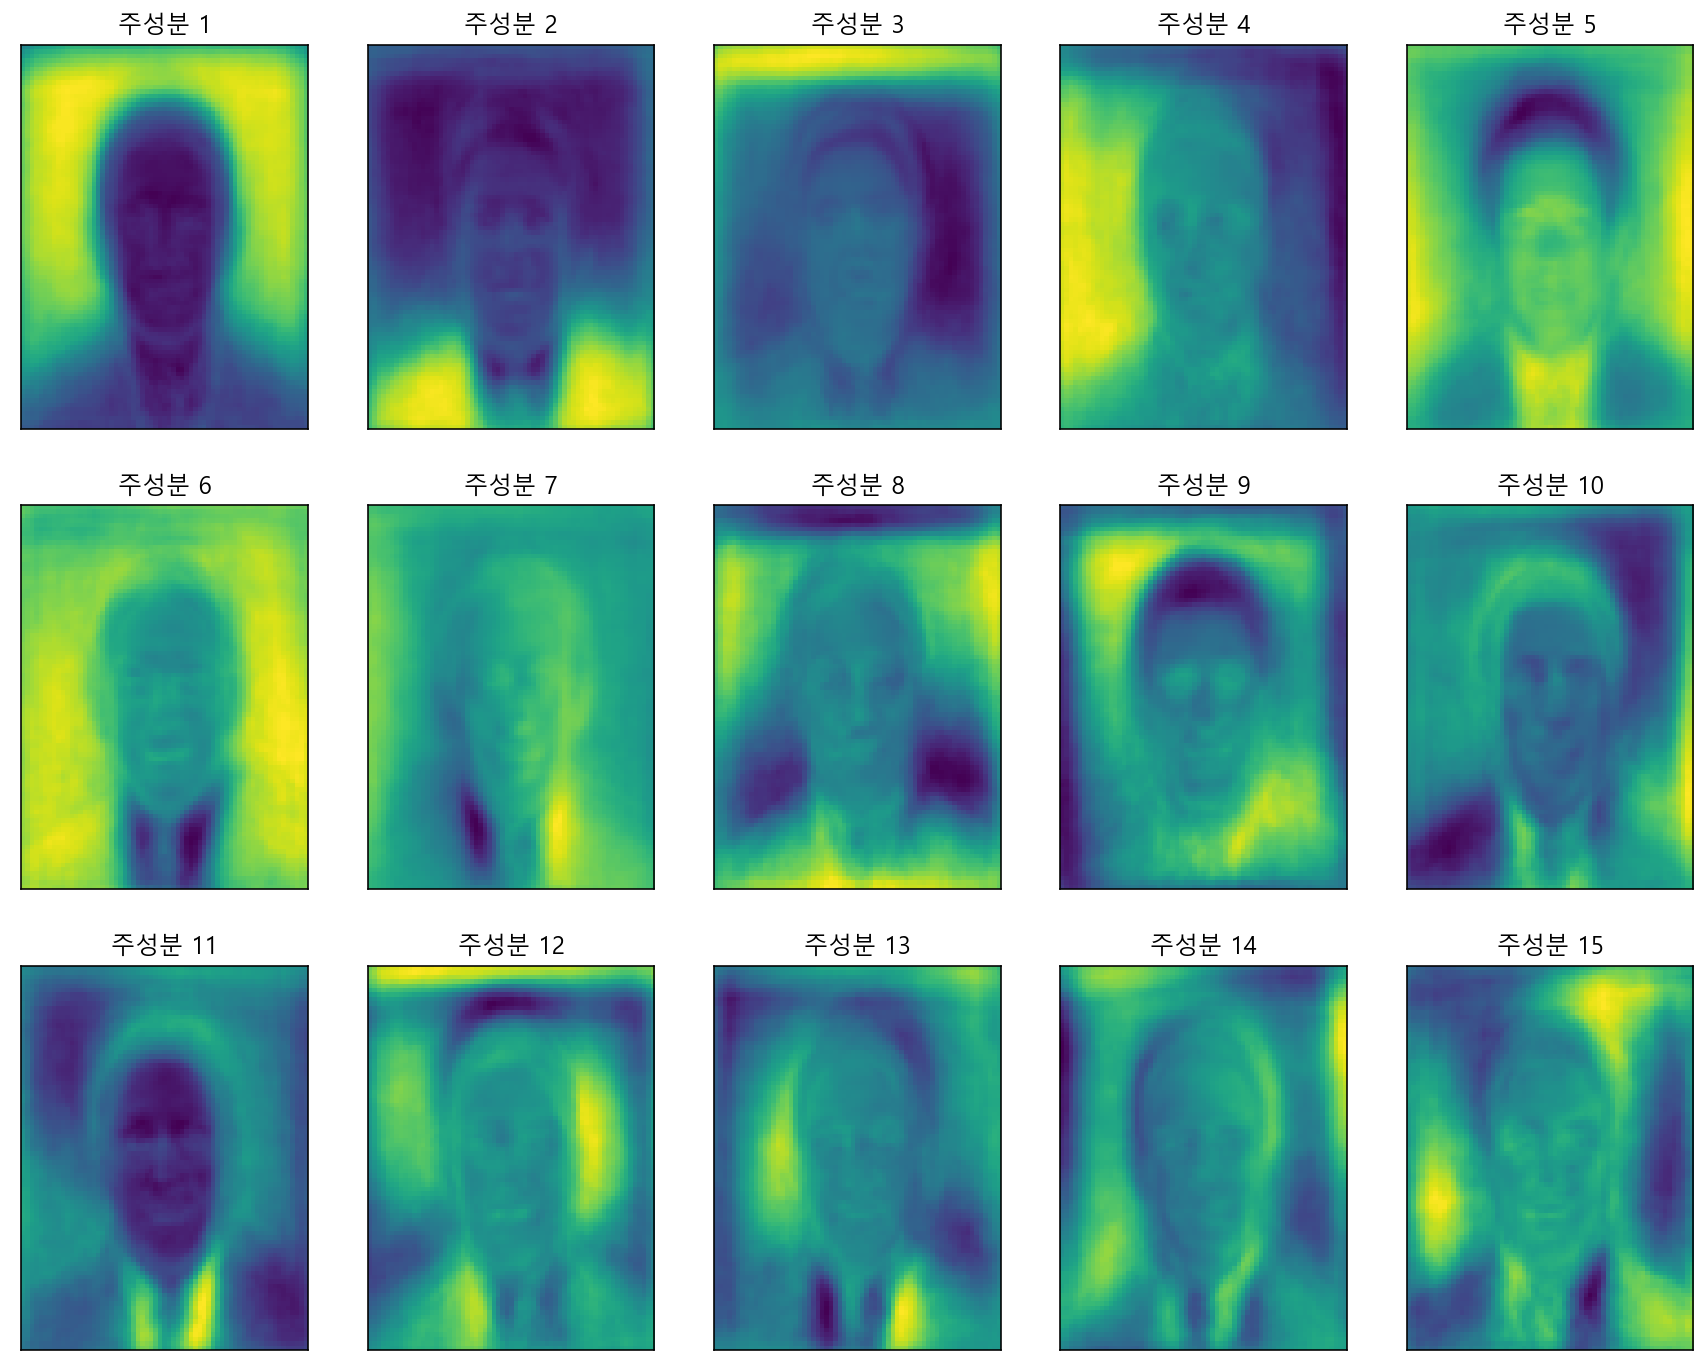

In [97]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

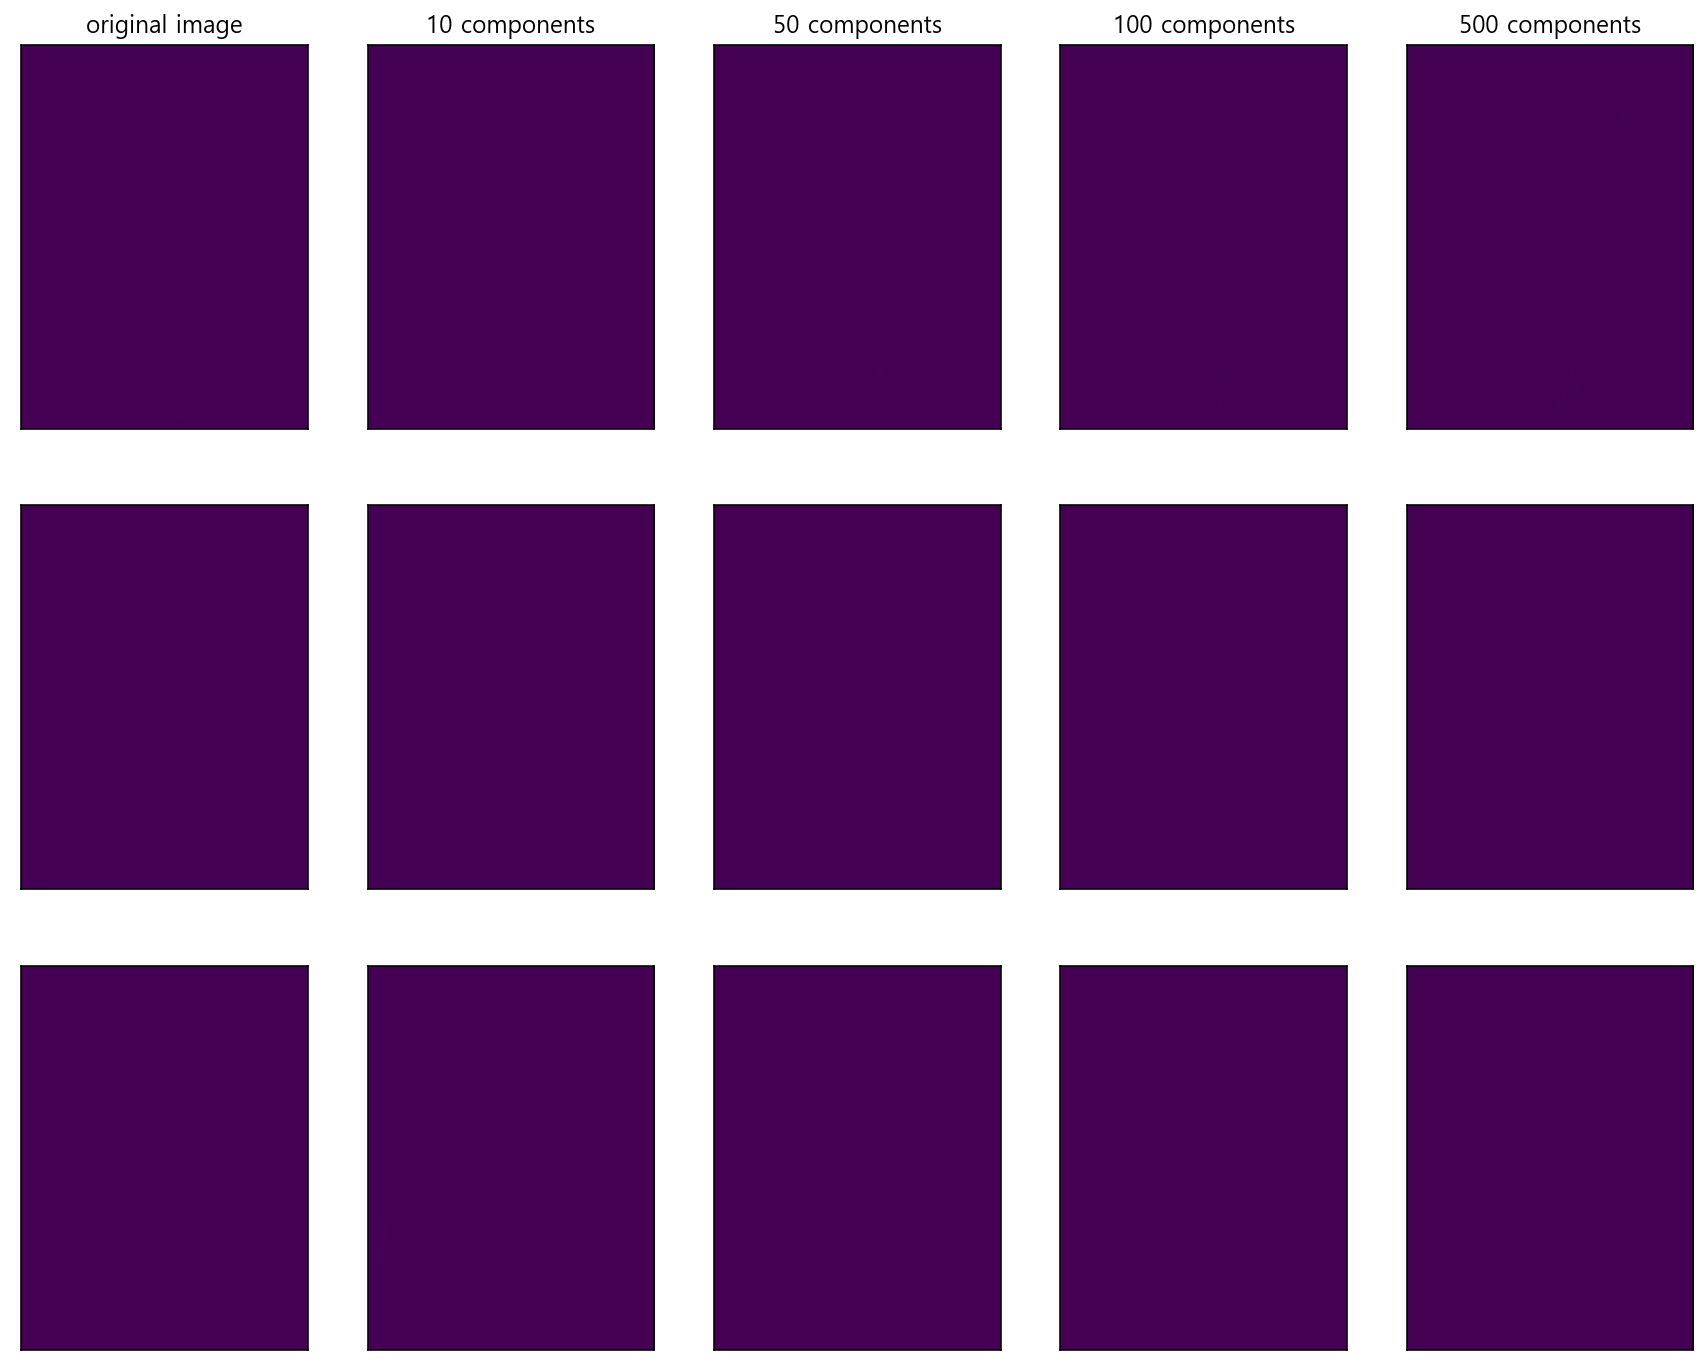

In [98]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

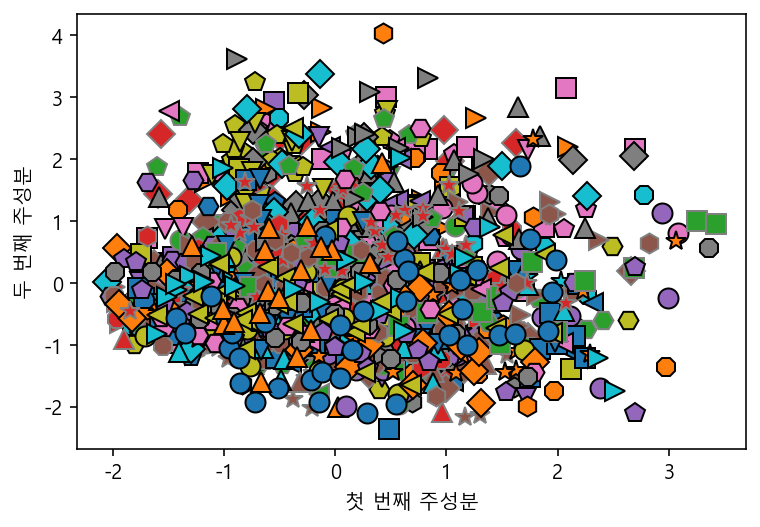

In [84]:
# 처음 두 개의 주성분을 이용하여 만든 얼굴 데이터셋의 산점도
# cancer 데이터셋에 대한 유사한 그래프
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")